<a href="https://colab.research.google.com/github/gmdeorozco/Coursera-Data-Science/blob/master/PieChartsBoxPlotsScatterPlotsAndBubblePlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
import io
import requests

base_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
r = requests.get(base_url)
content = r.content

r.status_code

200

In [3]:
text = io.BytesIO(content)
df_can = pd.read_excel(
    text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-6-5b807af711f8>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# Visualizing Data using Matplotlib<a id="4"></a>

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


# Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [8]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


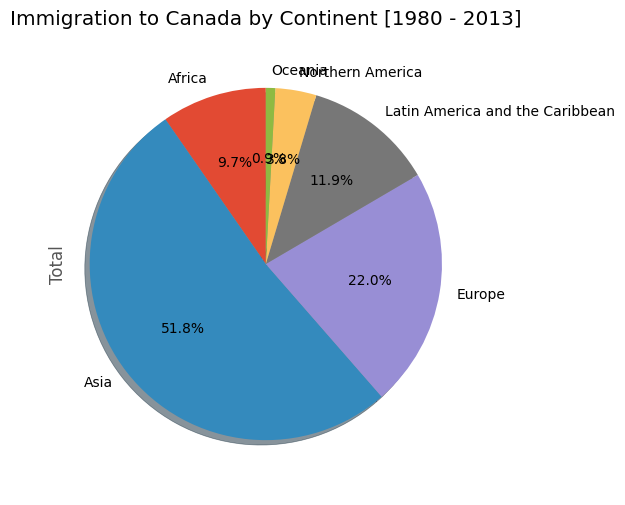

In [9]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


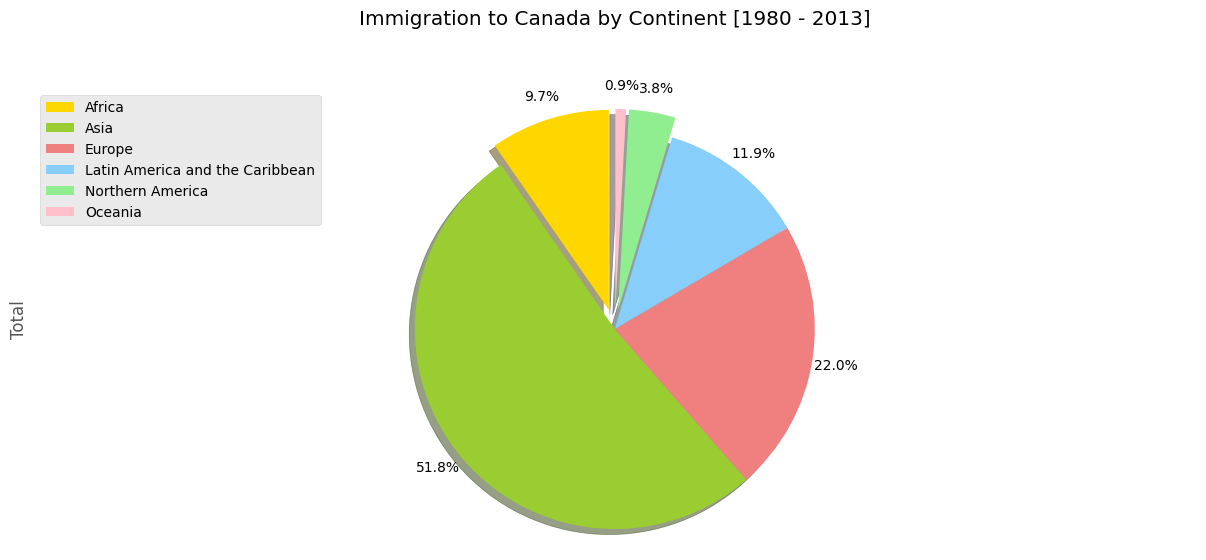

In [10]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()